In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [7]:
X,y = make_blobs(n_samples = 1000, centers = 3, n_features =2)

In [8]:
X

array([[  6.17175606,  -0.42311399],
       [  0.97860501, -11.42467697],
       [  6.57631387,  -0.59253519],
       ...,
       [ -9.05024809,  -5.58225842],
       [ -9.68429085,  -5.67649818],
       [  7.74204176,  -0.22641848]], shape=(1000, 2))

In [9]:
y

array([2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 2, 1, 0, 1, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0,
       0, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2,
       0, 0, 1, 2, 1, 1, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 2, 1,
       1, 1, 0, 1, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2, 2,
       1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 0,
       2, 0, 0, 1, 0, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 2,
       0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 1, 1, 0, 0, 2,
       1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 0, 2, 1, 0, 0, 1, 0, 2,
       2, 1, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 0,
       2, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 2, 0, 2, 1,

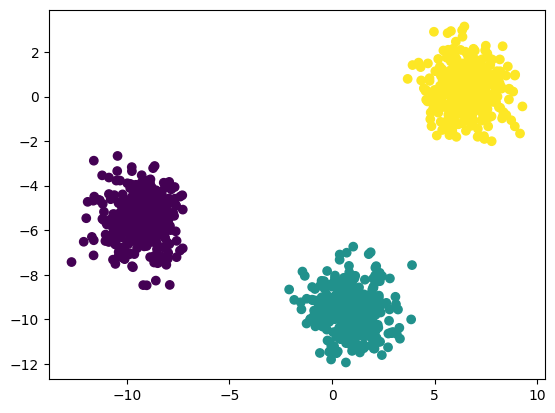

In [10]:
plt.scatter(X[:,0],X[:,1], c = y)

In [11]:
## standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
from sklearn.cluster import KMeans

In [15]:
## Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [16]:
wcss

[1340.0000000000011,
 428.6861163772339,
 55.48011370456802,
 46.25573505017228,
 39.34501362134472,
 35.48194066678936,
 28.044636684300592,
 25.15751194400161,
 23.069148810600108,
 20.93667919325912]

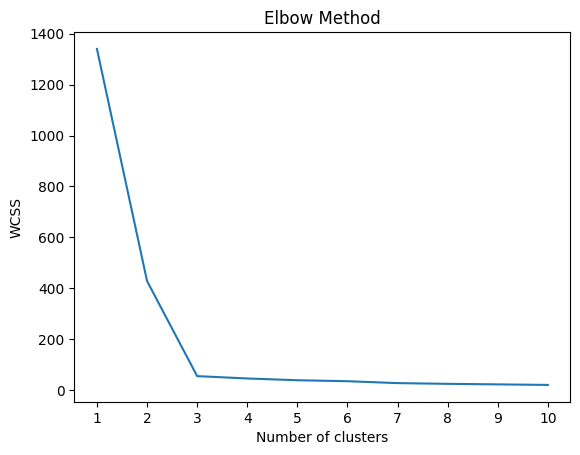

In [20]:
## plot the elbow method
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
kmeans = KMeans(n_clusters=3, init='k-means++')

In [22]:
kmeans.fit_predict(X_train_scaled)

array([0, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 0, 2, 1, 2,
       0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 2,
       2, 1, 2, 2, 1, 2, 0, 0, 1, 2, 2, 1, 0, 2, 2, 1, 1, 1, 1, 0, 0, 0,
       0, 2, 1, 0, 2, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 0, 1, 1, 2, 0,
       0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 2, 1, 2, 0, 0, 2, 0,
       2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 0,
       1, 2, 2, 0, 1, 1, 1, 0, 1, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0,
       0, 2, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 2, 1, 2, 0,
       2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 0, 1, 1, 2, 1, 2, 2, 0,
       2, 0, 2, 2, 0, 1, 2, 2, 2, 1, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 1, 0,
       0, 1, 2, 0, 1, 2, 2, 1, 2, 2, 1, 0, 0, 0, 2,

In [23]:
y_pred = kmeans.predict(X_test_scaled)

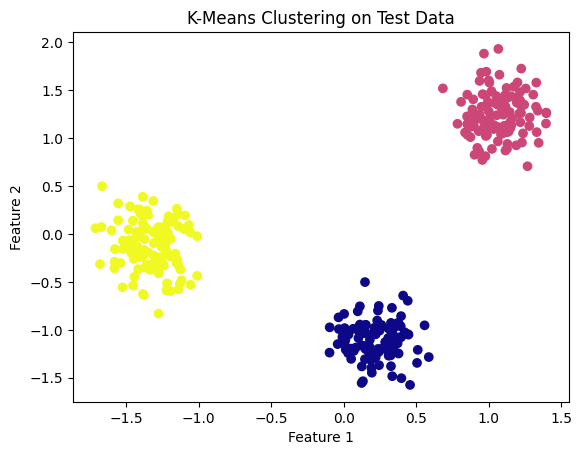

In [25]:
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, cmap='plasma')
plt.title('K-Means Clustering on Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [27]:
## validate the model
## kneelocator method

In [29]:
from kneed import KneeLocator

In [30]:
kl = KneeLocator(range(1,11), wcss, curve = 'convex', direction = 'decreasing')

In [32]:
kl.elbow

np.int64(3)

In [33]:
## silhotte score
from sklearn.metrics import silhouette_score


In [34]:
silhouette_coefficient = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficient.append(score)

In [35]:
silhouette_coefficient

[0.673936561656684,
 0.821819933250783,
 0.664427693888058,
 0.6577701033604542,
 0.38767043956164726,
 0.3731195011215513,
 0.3498894522666055,
 0.34471618713717067,
 0.35123045089338695]

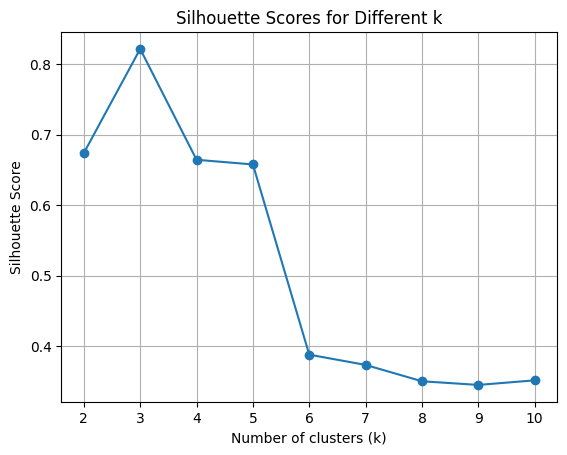

In [ ]:
## plotting silhouette scores
plt.plot(range(2, 11), silhouette_coefficient, marker='o')
plt.xticks(range(2, 11))
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()  

## answer k = 3 